# Exploratory Data Analysis on Cardiotocographic Dataset
Objective: To uncover insights, identify patterns, and understand the dataset's underlying structure.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

### Load Dataset

In [32]:
file_path = r"C:\Users\vikes\Downloads\EDA1\EDA1\Cardiotocographic.csv"
df = pd.read_csv(file_path)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


### Data Overview

In [33]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


(2126, 14)

### Check for Missing Values

In [34]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

### Check Data Types

In [35]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

### Summary Statistics

In [36]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


### Outlier Detection and Removal

In [37]:
z_scores = np.abs(zscore(df))
df_clean = df[(z_scores < 3).all(axis=1)]
df.shape, df_clean.shape

((2126, 14), (0, 14))

### Histograms for Distribution

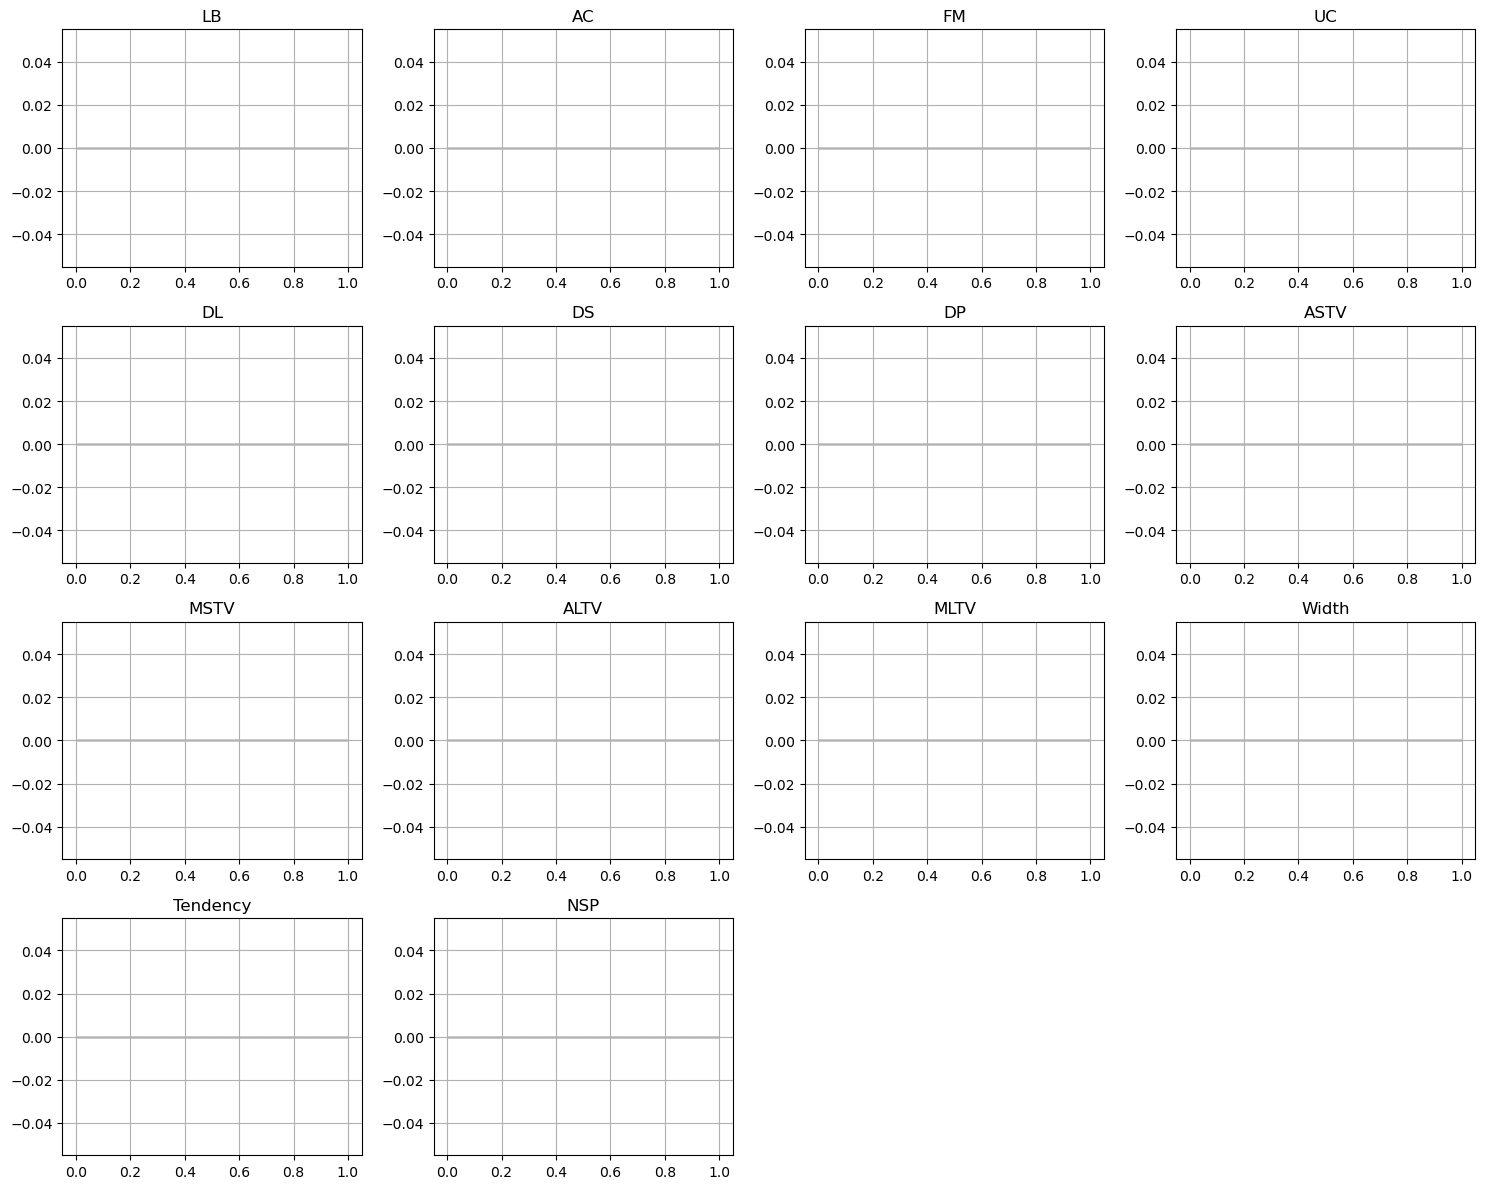

In [38]:
df_clean.hist(figsize=(15,12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### Boxplot for Outliers

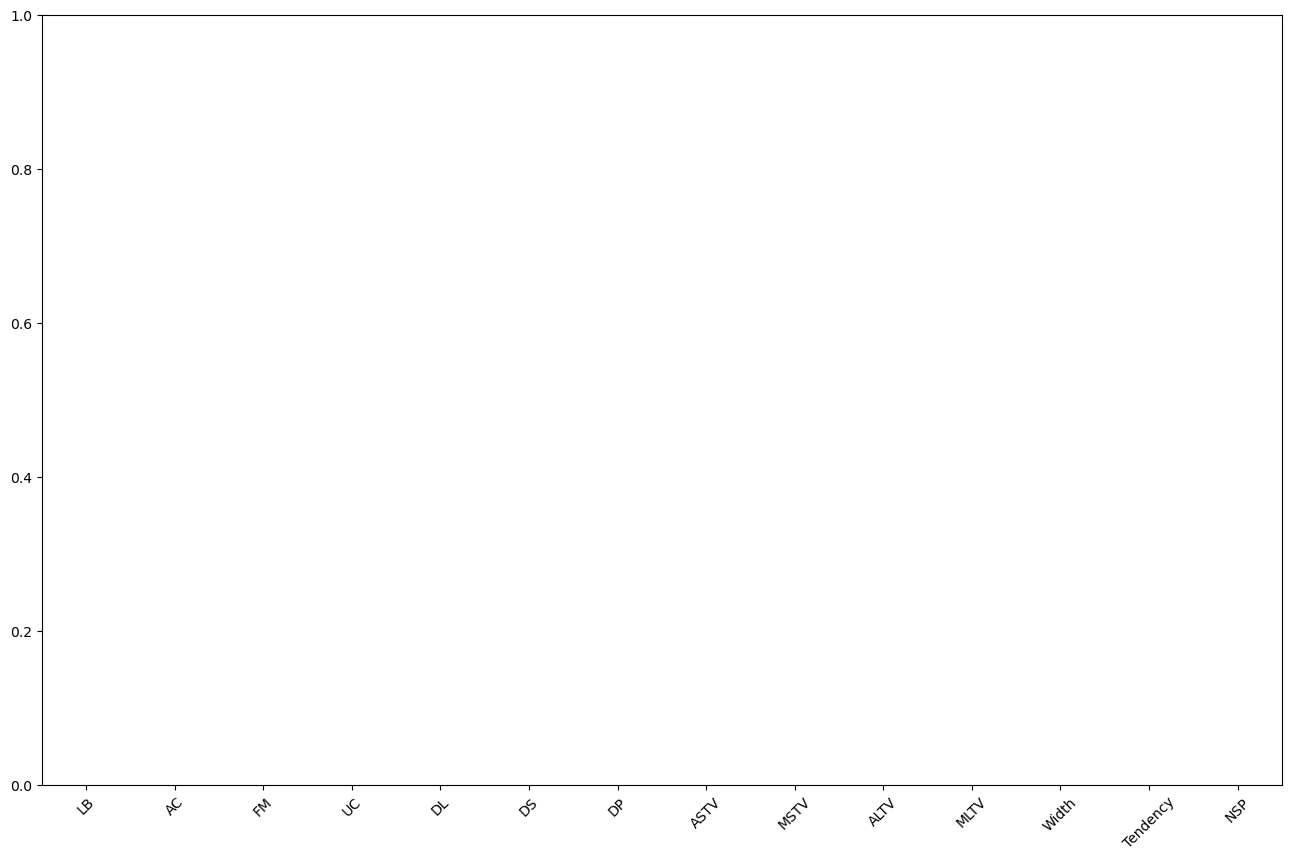

In [39]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.show()

### Categorical-Like Visualization by Binning 'UC'

In [40]:
print('UC' in df_clean.columns)
print(df_clean['UC'].isna().sum())
print(df_clean['UC'].dropna().empty)
df_clean = df_clean.dropna(subset=['UC'])  # or fillna if appropriate
print(df_clean['UC'].head(10))



True
0
True
Series([], Name: UC, dtype: float64)


In [43]:
df_clean['UC'] = pd.to_numeric(df_clean['UC'], errors='coerce')
df_clean = df_clean[df_clean['UC'].notna()]

plt.show()

### Correlation Heatmap

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


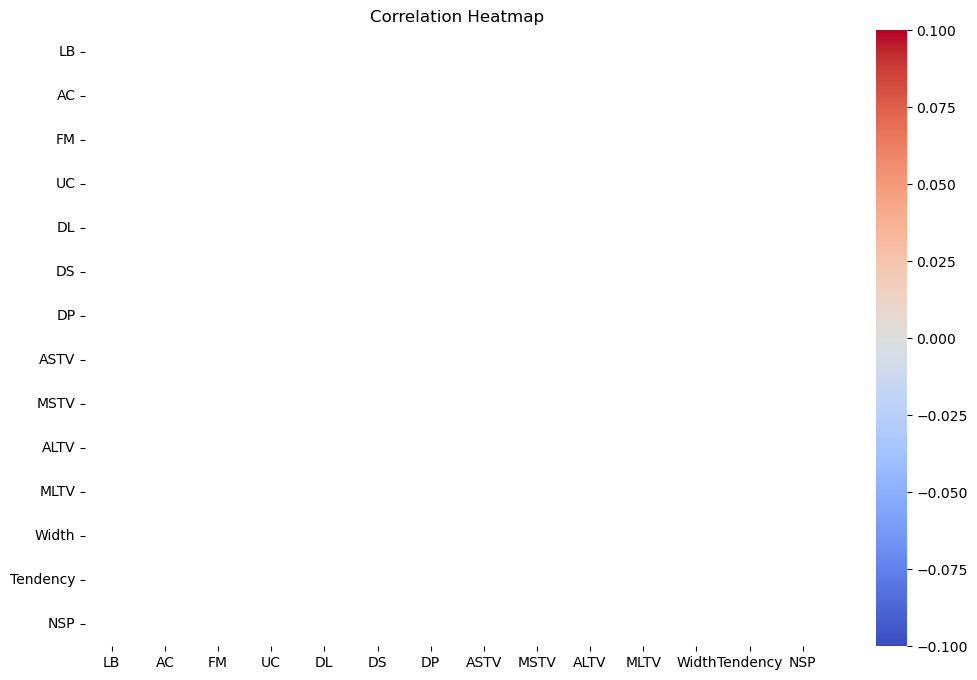

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Pair Plot for Selected Features

In [45]:
print(df_clean.shape)
print(df_clean.columns)
print(df_clean[['LB', 'AC', 'FM', 'UC']].dropna().shape)


(0, 14)
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
(0, 4)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


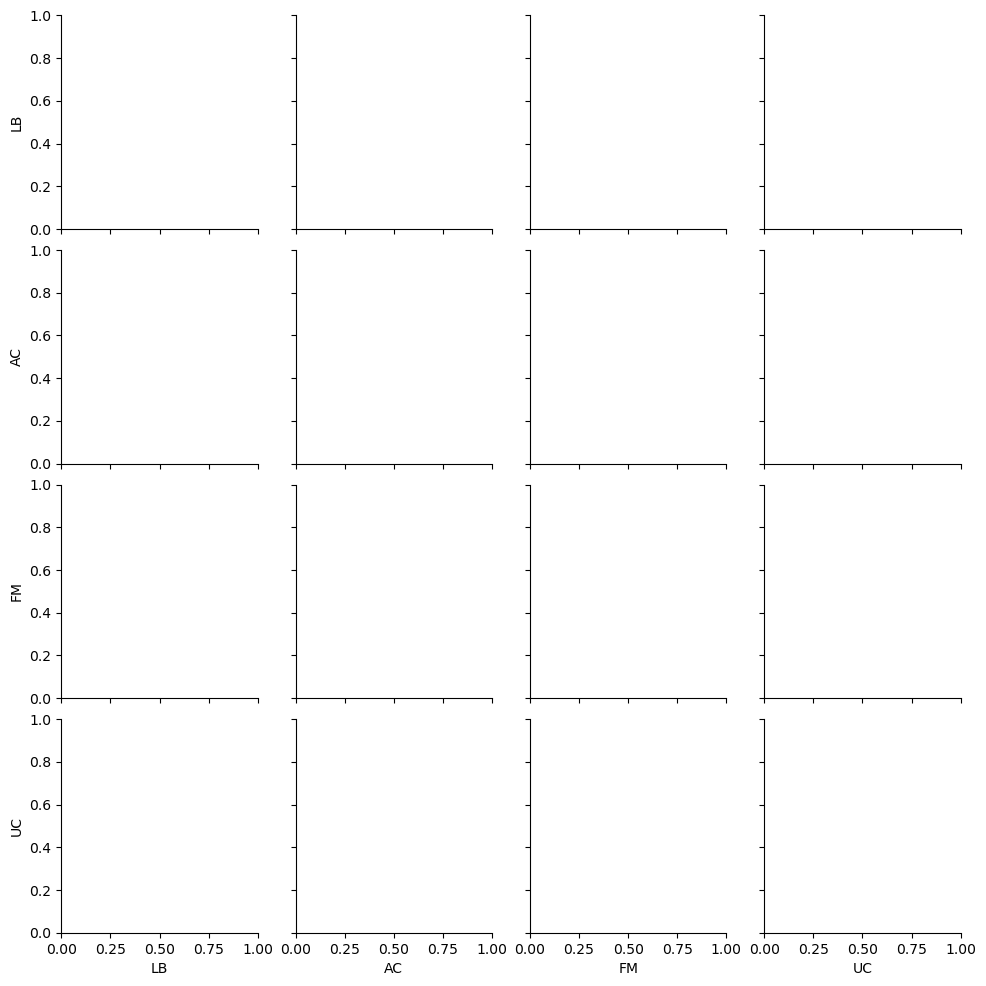

In [46]:
subset = df_clean[['LB', 'AC', 'FM', 'UC']]
if len(subset) >= 100:
    sns.pairplot(subset.sample(100))
else:
    sns.pairplot(subset)
plt.show()


### Violin Plot - LB vs Binned UC

In [47]:
print(df_clean['UC'].describe())
if df_clean['UC'].nunique() > 1:
    df_clean['UC_binned'] = pd.cut(df_clean['UC'], bins=4)
else:
    print("UC has no variation — cannot bin.")

if 'UC_binned' in df_clean.columns:
    df_clean['UC_binned'].value_counts().sort_index().plot(kind='bar')
    plt.title('UC Binned Frequencies')
    plt.show()


if 'UC_binned' in df_clean.columns:
    sns.violinplot(x='UC_binned', y='LB', data=df_clean)
    plt.title('LB Distribution by UC Range')
    plt.show()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: UC, dtype: float64
UC has no variation — cannot bin.


In [48]:
print(df_clean[['LB', 'AC', 'FM', 'UC']].dropna().shape)



(0, 4)


In [49]:
df_clean[['LB', 'AC', 'FM', 'UC']].loc[(df_clean[['LB', 'AC', 'FM', 'UC']] != 0).all(axis=1)]


,LB,AC,FM,UC


## Conclusion
- No missing values or incorrect data types found.
- Outliers were removed using Z-score.
- UC, DP, and DL had strong skewness.
- MSTV and MLTV showed high correlation.
- LB slightly decreased with higher UC values.

Next Steps: Use findings for machine learning or predictive analytics.